# Preprocess Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("resources/stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


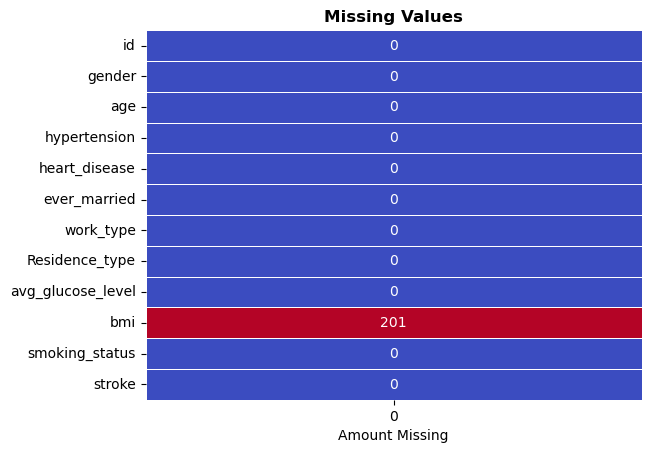

In [4]:
plt.title('Missing Values',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='coolwarm', linewidths=0.5,cbar=False)
ax.set_xlabel('Amount Missing')
plt.show()

### Fill missing values

In [5]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

Text(0.5, 1.0, 'Stroke')

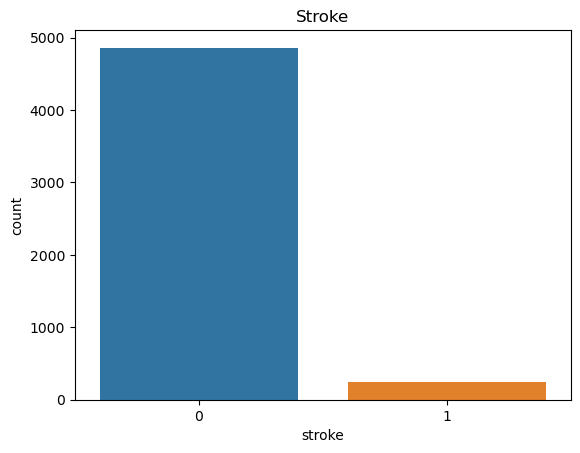

In [6]:
sns.countplot(data=df, x="stroke")
plt.title('Stroke')

# Model preparation

In [7]:
from sklearn.preprocessing import LabelEncoder

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1})
df['ever_married'] = df['ever_married'].replace({'No':0,'Yes':1})
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1})
df['work_type'] = df['work_type'].replace({'Never_worked':-2,
                                           'children':-1, 
                                           'Private':0,
                                           'Self-employed':1,
                                           'Govt_job':2})

df['smoking_status'] = LabelEncoder().fit_transform(df['smoking_status'])

## Split dataset

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['stroke', 'id'], axis=1)
y = df['stroke']

## Balance dataset

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
oversampler = SMOTE()

i,X_test_init, j, y_test_init = train_test_split(X, y, test_size=0.2, random_state=42)

X, y = oversampler.fit_resample(X,y)
X_train_res, X_test, y_train_res, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='stroke', ylabel='count'>

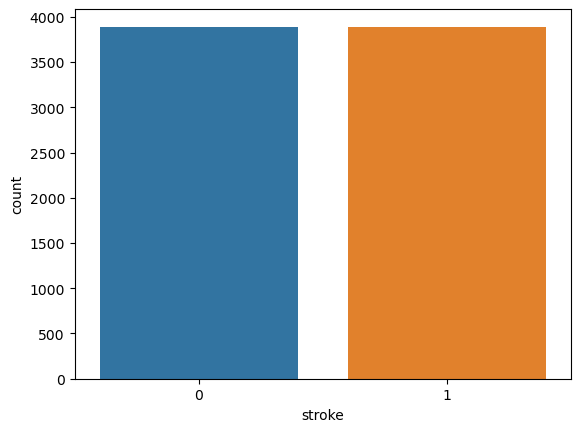

In [11]:
sns.countplot(x=y_train_res)

## Building Models

### RandomForest

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix


rf_pipeline = Pipeline(steps = [
                                ('KNN',KNeighborsClassifier())])


# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# rf_cv = cross_val_score(rf_pipeline,
#                         X_train_res,
#                         y_train_res,
#                         cv=cv,
#                         scoring='f1')

In [13]:
rf_pipeline.fit(X_train_res, y_train_res)
y_pred = rf_pipeline.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       975
           1       0.83      0.98      0.90       970

    accuracy                           0.89      1945
   macro avg       0.91      0.89      0.89      1945
weighted avg       0.91      0.89      0.89      1945



In [15]:
rf_pipeline.score(X_test, y_test)

0.8925449871465295

<Axes: >

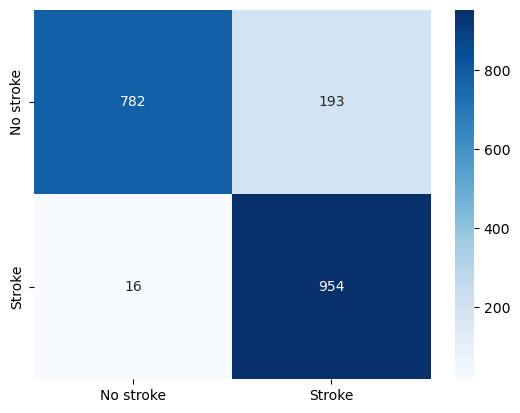

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['No stroke', 'Stroke'], yticklabels=['No stroke', 'Stroke'])

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       960
           1       0.30      1.00      0.46        62

    accuracy                           0.86      1022
   macro avg       0.65      0.92      0.69      1022
weighted avg       0.96      0.86      0.89      1022



<Axes: >

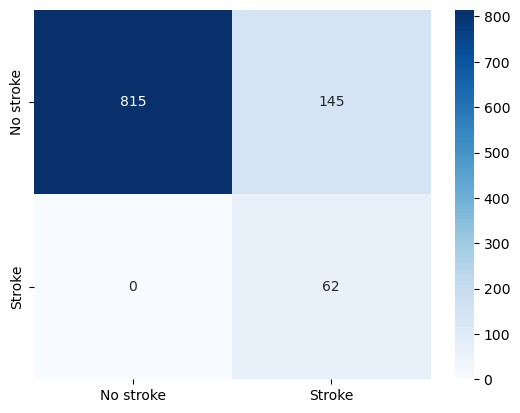

In [17]:
y_pred = rf_pipeline.predict(X_test_init)



print(classification_report(y_test_init, y_pred))



cm = confusion_matrix(y_test_init, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['No stroke', 'Stroke'], yticklabels=['No stroke', 'Stroke'])